In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv('immo_data.csv')
df1.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df_berlin=df1[df1['regio1']=='Berlin']
column_to_keep=[]
for columns in df_berlin.columns:
    if (df_berlin[columns].isna().sum())<2000:
        column_to_keep.append(columns)
df_berlin=df_berlin[column_to_keep]
df_berlin.drop(columns=['date', 'serviceCharge','picturecount','pricetrend','scoutId','geo_bln','baseRent','houseNumber','geo_krs','street','baseRentRange','streetPlain','livingSpaceRange','regio2','description','facilities'], inplace=True)
df_berlin.drop(columns=['yearConstructed','yearConstructedRange','noRoomsRange','geo_plz'], inplace=True)
df_berlin.drop(columns=['heatingType','telekomTvOffer','telekomUploadSpeed'], inplace=True)
df_berlin['typeOfFlat'] = df_berlin['typeOfFlat'].str.replace('_', ' ')
df_berlin['regio3'] = df_berlin['regio3'].str.replace('_', ', ')
df_berlin['regio3'] = df_berlin['regio3'].str.replace('Neu, ', 'Neu-')
df_berlin['regio3'] = df_berlin['regio3'].str.replace('Alt, ', 'Alt-')
df_berlin['regio3'] = df_berlin['regio3'].str.replace('Prenzlauer, Berg, Prenzlauer, Berg', 'Prenzlauer, Berg')
df_berlin = df_berlin.dropna(subset=['totalRent'])

In [6]:
for index, row in df_berlin.iterrows():
    if row['typeOfFlat'] == 'other' and row['floor'] > 0:
        df_berlin.at[index, 'typeOfFlat'] = 'apartment'
    elif row['typeOfFlat'] == 'other' and row['floor'] == 0:
        df_berlin.at[index, 'typeOfFlat'] = 'ground floor'
    elif row['typeOfFlat'] == 'other' and row['floor'] == 0:
        df_berlin.at[index, 'typeOfFlat'] = 'half basement'
        
for index, row in df_berlin.iterrows():
    if pd.isna(row['typeOfFlat']) and row['floor'] > 0:
        df_berlin.at[index, 'typeOfFlat'] = 'apartment'
    elif pd.isna(row['typeOfFlat']) and row['floor'] == 0:
        df_berlin.at[index, 'typeOfFlat'] = 'ground floor'
    elif pd.isna(row['typeOfFlat'])  and row['floor'] == 0:
        df_berlin.at[index, 'typeOfFlat'] = 'half basement'      

In [7]:
df_berlin.drop(columns=['floor'], inplace=True)
df_berlin = df_berlin.dropna(subset=['typeOfFlat'])

df_berlin = df_berlin[df_berlin['typeOfFlat'] != 'other']


In [8]:
df_berlin.drop(columns=['regio1'], inplace=True)

In [9]:
df_berlin = df_berlin[df_berlin['totalRent'] > 230]
df_berlin = df_berlin[df_berlin['totalRent']<7500]


In [10]:
df_berlin = df_berlin[df_berlin['noRooms']<12]
df_berlin = df_berlin[~((df_berlin['livingSpace'] < 25) & (df_berlin['noRooms'] > 1))]
df_berlin = df_berlin[((df_berlin['livingSpace'] < 350))]

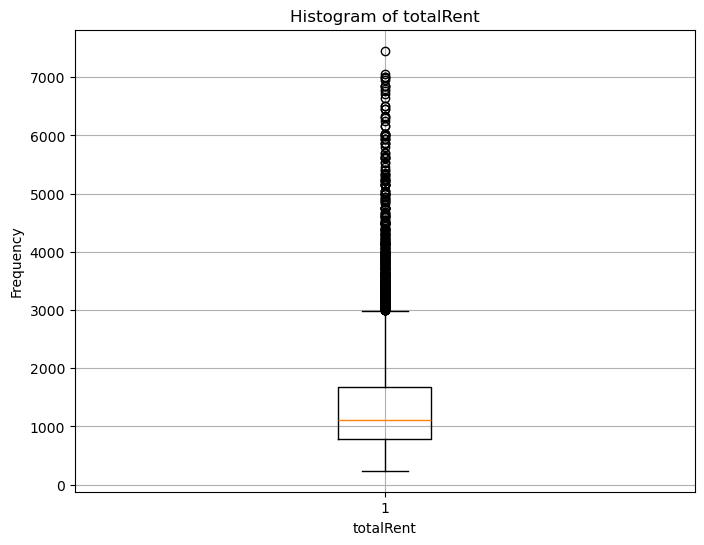

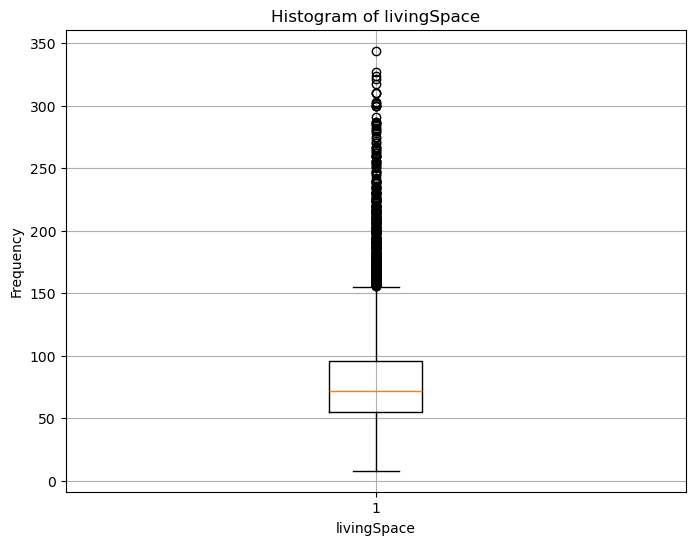

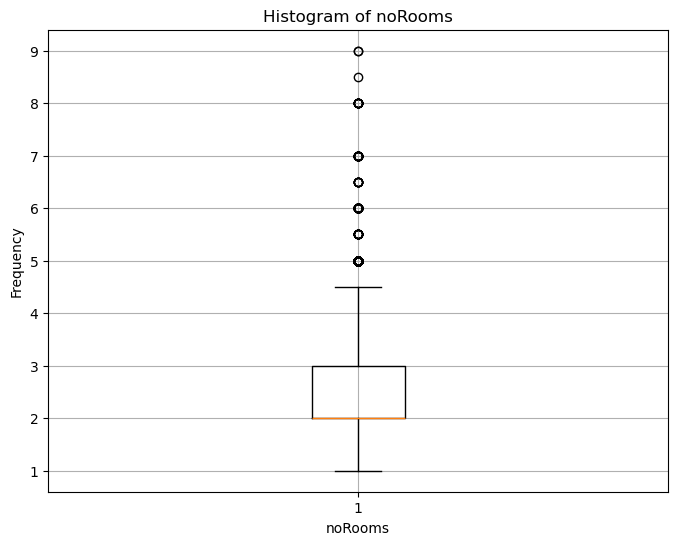

In [11]:
numerical_columns = df_berlin.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_berlin[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [12]:
df_berlin['newlyConst'] = df_berlin['newlyConst'].replace(True, 1)
df_berlin['newlyConst'] = df_berlin['newlyConst'].replace(False, 0)
df_berlin['balcony'] = df_berlin['balcony'].replace(True, 1)
df_berlin['balcony'] = df_berlin['balcony'].replace(False, 0)
df_berlin['hasKitchen'] = df_berlin['hasKitchen'].replace(True, 1)
df_berlin['hasKitchen'] = df_berlin['hasKitchen'].replace(False, 0)
df_berlin['cellar'] = df_berlin['cellar'].replace(True, 1)
df_berlin['cellar'] = df_berlin['cellar'].replace(False, 0)
df_berlin['lift'] = df_berlin['lift'].replace(True, 1)
df_berlin['lift'] = df_berlin['lift'].replace(False, 0)
df_berlin['garden'] = df_berlin['garden'].replace(True, 1)
df_berlin['garden'] = df_berlin['garden'].replace(False, 0)

In [13]:
regio3_stat_less_than_10=df_berlin['regio3'].value_counts()[df_berlin['regio3'].value_counts() <=10]

In [14]:
regio3_stat_less_than_10

regio3
Schmöckwitz, Köpenick           10
Müggelheim, Köpenick             8
Konradshöhe, Reinickendorf       5
Blankenburg, Weißensee           4
Falkenberg, Hohenschönhausen     4
Lübars, Reinickendorf            3
Gatow, Spandau                   3
Rummelsburg, Lichtenberg         2
Malchow, Hohenschönhausen        1
Name: count, dtype: int64

In [15]:
for index, row in df_berlin.iterrows():
    if row['regio3'] in regio3_stat_less_than_10:
        df_berlin.at[index, 'regio3'] = 'other'
        

In [16]:
dummies1=pd.get_dummies(df_berlin.typeOfFlat)

In [17]:
(df_berlin['regio3']=='other').value_counts()

regio3
False    9522
True       40
Name: count, dtype: int64

In [18]:
dummies1

,apartment,ground floor,half basement,loft,maisonette,penthouse,raised ground floor,roof storey,terraced flat
45,False,True,False,False,False,False,False,False,False
61,False,True,False,False,False,False,False,False,False
77,True,False,False,False,False,False,False,False,False
86,True,False,False,False,False,False,False,False,False
87,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
268716,False,False,False,False,False,False,False,True,False
268733,True,False,False,False,False,False,False,False,False
268746,True,False,False,False,False,False,False,False,False
268758,True,False,False,False,False,False,False,False,False


In [19]:
df_berlin_flat_type=pd.concat([df_berlin,dummies1.drop('half basement',axis='columns')],axis='columns')

In [20]:
df_berlin_flat_type

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,lift,typeOfFlat,noRooms,garden,regio3,apartment,ground floor,loft,maisonette,penthouse,raised ground floor,roof storey,terraced flat
45,0,1,1140.00,1,0,77.00,1,ground floor,3.0,0,"Staaken, Spandau",False,True,False,False,False,False,False,False
61,0,0,955.00,0,0,62.63,0,ground floor,2.0,0,"Weißensee, Weißensee",False,True,False,False,False,False,False,False
77,1,1,1300.00,1,1,46.40,1,apartment,2.0,0,"Mitte, Mitte",True,False,False,False,False,False,False,False
86,0,1,1428.78,1,1,67.00,1,apartment,2.5,0,"Kreuzberg, Kreuzberg",True,False,False,False,False,False,False,False
87,1,1,1559.05,1,1,73.54,1,ground floor,2.0,0,"Tiergarten, Tiergarten",False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268716,0,0,630.00,0,1,57.00,0,roof storey,1.0,0,"Friedrichshagen, Köpenick",False,False,False,False,False,False,True,False
268733,0,0,850.00,1,0,59.82,0,apartment,2.0,0,"Spandau, Spandau",True,False,False,False,False,False,False,False
268746,0,1,949.00,0,0,95.00,1,apartment,3.5,0,"Waidmannslust, Reinickendorf",True,False,False,False,False,False,False,False
268758,1,0,919.00,1,0,28.45,1,apartment,1.0,1,"Charlottenburg, Charlottenburg",True,False,False,False,False,False,False,False


In [21]:
dummies2=pd.get_dummies(df_berlin.regio3)

In [22]:
df_berlin_dummies=pd.concat([df_berlin_flat_type,dummies2.drop('Bohnsdorf, Treptow',axis='columns')],axis='columns')

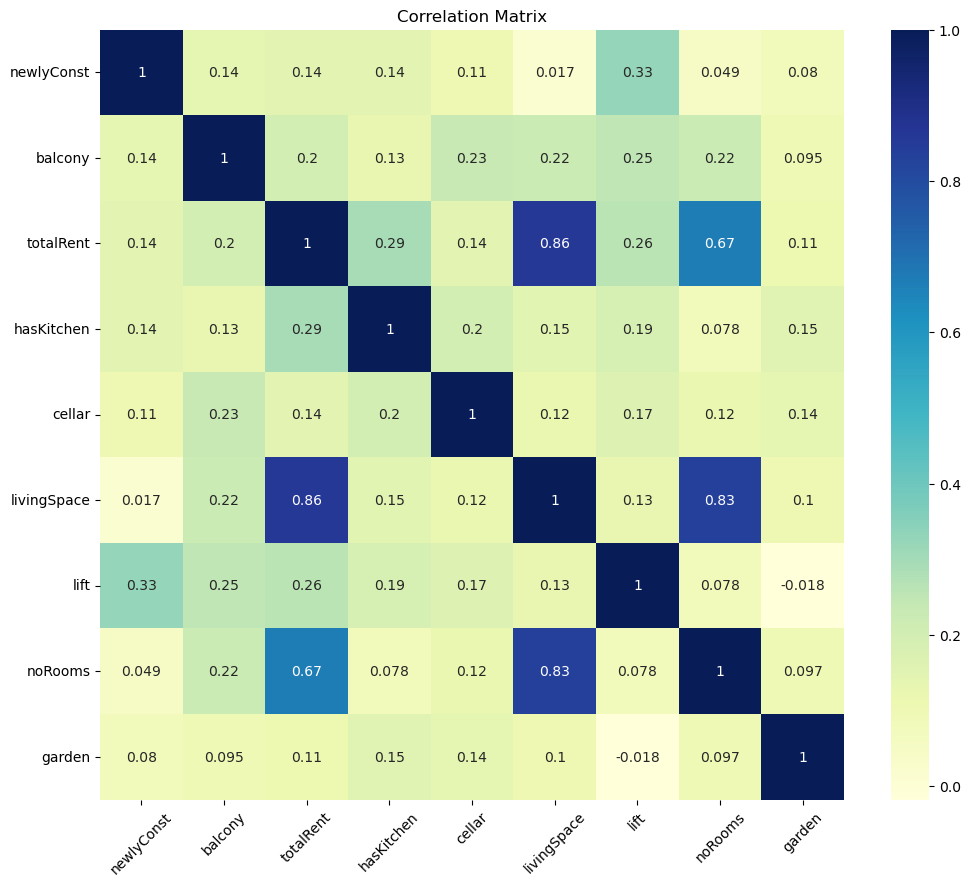

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = df_berlin.select_dtypes(include=['int64', 'float64'])

# Create heatmap with correlation coefficients annotated
plt.figure(figsize=(12, 10))  # Increase the size of the figure
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees for better readability
plt.yticks(rotation=0)   # Keep y-axis tick labels horizontal
plt.title('Correlation Matrix')
plt.show()


In [24]:
df_berlin_dummies.drop(columns=['regio3','typeOfFlat'], inplace=True)

In [25]:
df_berlin_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9562 entries, 45 to 268829
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   newlyConst                              9562 non-null   int64  
 1   balcony                                 9562 non-null   int64  
 2   totalRent                               9562 non-null   float64
 3   hasKitchen                              9562 non-null   int64  
 4   cellar                                  9562 non-null   int64  
 5   livingSpace                             9562 non-null   float64
 6   lift                                    9562 non-null   int64  
 7   noRooms                                 9562 non-null   float64
 8   garden                                  9562 non-null   int64  
 9   apartment                               9562 non-null   bool   
 10  ground floor                            9562 non-null   bool  

In [26]:
df_berlin_dummies = df_berlin_dummies.replace(True, 1)
df_berlin_dummies= df_berlin_dummies.replace(False, 0)

In [27]:
X=df_berlin_dummies.drop(columns=['totalRent'])

In [28]:
X.columns

Index(['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'livingSpace', 'lift',
       'noRooms', 'garden', 'apartment', 'ground floor', 'loft', 'maisonette',
       'penthouse', 'raised ground floor', 'roof storey', 'terraced flat',
       'Adlershof, Treptow', 'Alt-Hohenschönhausen, Hohenschönhausen',
       'Altglienicke, Treptow', 'Baumschulenweg, Treptow', 'Biesdorf, Marzahn',
       'Britz, Neukölln', 'Buch, Pankow', 'Buckow, Neukölln',
       'Charlottenburg, Charlottenburg', 'Dahlem, Zehlendorf',
       'Französisch, Buchholz, Pankow', 'Friedenau, Schöneberg',
       'Friedrichsfelde, Lichtenberg', 'Friedrichshagen, Köpenick',
       'Friedrichshain, Friedrichshain', 'Frohnau, Reinickendorf',
       'Grunewald, Wilmersdorf', 'Grünau, Köpenick', 'Haselhorst, Spandau',
       'Heiligensee, Reinickendorf', 'Heinersdorf, Weißensee',
       'Hellersdorf, Hellersdorf', 'Hermsdorf, Reinickendorf',
       'Johannisthal, Treptow', 'Karlshorst, Lichtenberg', 'Karow, Weißensee',
       'Ka

In [29]:
Y=df_berlin_dummies['totalRent']

In [30]:
X_array = X.values


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
binary_columns = [col for col in X.columns if col not in [ 'livingSpace', 'noRooms']]

continuous_columns = ['livingSpace', 'noRooms']
scaled_continuous_features = scaler.fit_transform(df_berlin_dummies[continuous_columns])
X_scalled = np.concatenate((scaled_continuous_features, X[binary_columns].values), axis=1)
X_scalled

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=  train_test_split(X_array, Y, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

   


In [33]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'knn_regressor' : KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    print(f"{name}: MSE {mse}, Score: {score}")

Linear Regression: MSE 125133.90709125627, Score: 0.8407218236491052
Ridge Regression: MSE 125095.81990315777, Score: 0.8407703033777709
Lasso Regression: MSE 127564.22845259325, Score: 0.8376283603074861
ElasticNet: MSE 178250.00080559193, Score: 0.7731123743930151
Random Forest: MSE 107792.19342357384, Score: 0.8627954293727201
Gradient Boosting: MSE 116753.1158942125, Score: 0.8513894130281316
knn_regressor: MSE 138788.2518131082, Score: 0.8233417291797701


In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [ 120,135,140],
    'max_depth': [ 22,23],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf = RandomForestRegressor()
 

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_

predictions = best_rf_model.predict(X_test)

print ('score is', best_rf_model.score(X_test, y_test))

score is 0.8645079634284781


In [35]:
best_params

{'max_depth': 23,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

In [36]:
df_berlin_dummies.columns

Index(['newlyConst', 'balcony', 'totalRent', 'hasKitchen', 'cellar',
       'livingSpace', 'lift', 'noRooms', 'garden', 'apartment', 'ground floor',
       'loft', 'maisonette', 'penthouse', 'raised ground floor', 'roof storey',
       'terraced flat', 'Adlershof, Treptow',
       'Alt-Hohenschönhausen, Hohenschönhausen', 'Altglienicke, Treptow',
       'Baumschulenweg, Treptow', 'Biesdorf, Marzahn', 'Britz, Neukölln',
       'Buch, Pankow', 'Buckow, Neukölln', 'Charlottenburg, Charlottenburg',
       'Dahlem, Zehlendorf', 'Französisch, Buchholz, Pankow',
       'Friedenau, Schöneberg', 'Friedrichsfelde, Lichtenberg',
       'Friedrichshagen, Köpenick', 'Friedrichshain, Friedrichshain',
       'Frohnau, Reinickendorf', 'Grunewald, Wilmersdorf', 'Grünau, Köpenick',
       'Haselhorst, Spandau', 'Heiligensee, Reinickendorf',
       'Heinersdorf, Weißensee', 'Hellersdorf, Hellersdorf',
       'Hermsdorf, Reinickendorf', 'Johannisthal, Treptow',
       'Karlshorst, Lichtenberg', 'Karow, We

In [44]:
def predict_price(newlyConst, balcony, hasKitchen, cellar, livingSpace, lift, noRooms, garden, floor, location):
    # Assuming X is your feature matrix
    loc_index = np.where(X.columns == location)[0]
    floor_index = np.where(X.columns == floor)[0]
    
    x = np.zeros(len(X.columns))
    x[0] = newlyConst
    x[1] = balcony
    x[2] = hasKitchen
    x[3] = cellar
    x[4] = livingSpace
    x[5] = lift
    x[6] = noRooms
    x[7] = garden
    
    if len(floor_index) >= 0:
        x[floor_index[0]] = 1
    if len(loc_index) >= 0:
        x[loc_index[0]] = 1
    
    return best_rf_model.predict([x])[0]


predict_price(1, 1, 1, 1, 20, 1, 1, 1, 'ground floor', 'Zehlendorf, Zehlendorf')


602.700334545724

In [45]:
import pickle
import json 

In [46]:
with open ('berlin_price_model.pickle','wb') as f:
    pickle.dump(best_rf_model,f)

In [47]:
columns={'data_columns':[col.lower()for col in X.columns]}
with open ("columns.json",'w') as f:
    f.write(json.dumps(columns))

In [ ]:
best_rf_model.feature_names_